In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster 
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

In [13]:
df = pd.read_csv(r'C:\Users\bradl\OneDrive\Documents\GitHub\Nursing-Home-Analysis\Data\2021_CostReport_Condensed.csv')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   State Code                           52 non-null     object
 1   Number of Facilities                 52 non-null     int64 
 2   Number of Beds                       52 non-null     int64 
 3   Inpatient Revenue                    52 non-null     int64 
 4   Net Patient Revenue                  52 non-null     int64 
 5   Less Total Operating Expense         52 non-null     int64 
 6   Inpatient PPS Amount                 52 non-null     int64 
 7   Allowable Bad Debts                  52 non-null     int64 
 8   Net Income from service to patients  52 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 3.8+ KB


In [15]:
z_scores = stats.zscore(df.select_dtypes(include=[np.number]))

threshold = 3

new_df = df[(np.abs(z_scores) < threshold).all(axis=1)]

In [16]:
relevant_columns = ['Net Patient Revenue', 'Less Total Operating Expense', 'Net Income from service to patients', 'Allowable Bad Debts', 'Inpatient PPS Amount']
weights = {'Net Patient Revenue': 0.3, 'Less Total Operating Expense': 0.2, 'Net Income from service to patients': 0.2, 'Allowable Bad Debts': 0.2, 'Inpatient PPS Amount': 0.1}

weighted_sum = np.sum(new_df[relevant_columns] * np.array(list(weights.values())), axis=1)
new_df['Risk Score'] = weighted_sum

C:\Users\bradl\AppData\Local\Temp\ipykernel_28656\2454812670.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Risk Score'] = weighted_sum


In [17]:
state_risk_scores = new_df.groupby('State Code')['Risk Score'].mean()
print(state_risk_scores)

State Code
AK    4.816881e+07
AL    1.030092e+09
AR    7.332250e+08
AZ    8.367252e+08
CO    9.044207e+08
CT    1.298666e+09
DC    1.622433e+08
DE    2.814823e+08
GA    1.520586e+09
HI    2.592790e+08
IA    1.037922e+09
ID    2.594155e+08
IL    3.055906e+09
IN    2.357299e+09
KS    8.233433e+08
KY    1.137774e+09
LA    1.107700e+09
MA    2.000388e+09
MD    1.665639e+09
ME    4.575639e+08
MI    2.066695e+09
MN    1.257691e+09
MO    1.655910e+09
MS    6.354618e+08
MT    1.433896e+08
NC    2.250132e+09
ND    2.491227e+08
NE    5.556429e+08
NH    3.796896e+08
NJ    2.712126e+09
NM    3.099123e+08
NV    3.694038e+08
OH    3.499760e+09
OK    7.682638e+08
OR    5.558668e+08
PR    9.586351e+05
RI    3.601039e+08
SC    9.047949e+08
SD    1.839247e+08
TN    1.340663e+09
UT    3.638158e+08
VA    1.881705e+09
VT    1.668258e+08
WA    1.017684e+09
WI    1.129905e+09
WV    5.479203e+08
WY    9.034930e+07
Name: Risk Score, dtype: float64


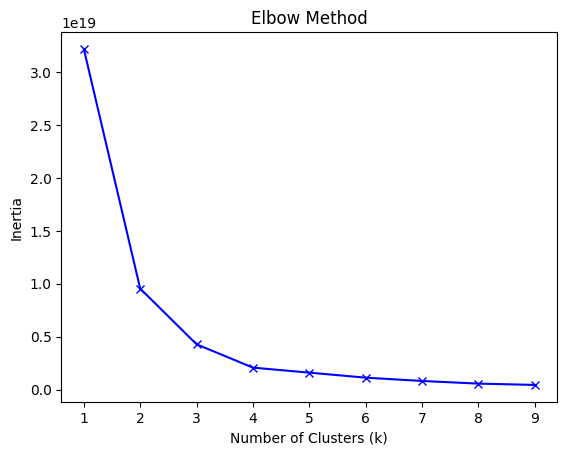

In [18]:
risk_scores = state_risk_scores.values.reshape(-1, 1)

inertia = []
k_values = range(1, 10) 

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(risk_scores)
    inertia.append(kmeans.inertia_)


plt.plot(k_values, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [10]:
label_encoder = LabelEncoder()

# Encode the "State Code" column
new_df['State Code'] = label_encoder.fit_transform(new_df['State Code'])

C:\Users\bradl\AppData\Local\Temp\ipykernel_28656\1064185953.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['State Code'] = label_encoder.fit_transform(new_df['State Code'])


In [19]:
state_risk_scores = new_df.groupby('State Code')['Risk Score'].mean()
risk_scores = state_risk_scores.values.reshape(-1, 1)
num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(risk_scores)


cluster_labels = kmeans.labels_

for state, label in zip(state_risk_scores.index, cluster_labels):
    print(f"State: {state}, Cluster: {label}")

State: AK, Cluster: 4
State: AL, Cluster: 2
State: AR, Cluster: 1
State: AZ, Cluster: 2
State: CO, Cluster: 2
State: CT, Cluster: 2
State: DC, Cluster: 4
State: DE, Cluster: 4
State: GA, Cluster: 0
State: HI, Cluster: 4
State: IA, Cluster: 2
State: ID, Cluster: 4
State: IL, Cluster: 3
State: IN, Cluster: 0
State: KS, Cluster: 2
State: KY, Cluster: 2
State: LA, Cluster: 2
State: MA, Cluster: 0
State: MD, Cluster: 0
State: ME, Cluster: 1
State: MI, Cluster: 0
State: MN, Cluster: 2
State: MO, Cluster: 0
State: MS, Cluster: 1
State: MT, Cluster: 4
State: NC, Cluster: 0
State: ND, Cluster: 4
State: NE, Cluster: 1
State: NH, Cluster: 1
State: NJ, Cluster: 3
State: NM, Cluster: 4
State: NV, Cluster: 1
State: OH, Cluster: 3
State: OK, Cluster: 1
State: OR, Cluster: 1
State: PR, Cluster: 4
State: RI, Cluster: 1
State: SC, Cluster: 2
State: SD, Cluster: 4
State: TN, Cluster: 2
State: UT, Cluster: 1
State: VA, Cluster: 0
State: VT, Cluster: 4
State: WA, Cluster: 2
State: WI, Cluster: 2
State: WV,

In [20]:
cluster_labels = [4, 2, 1, 2, 2, 2, 4, 4, 0, 4, 2, 4, 3, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 4, 0, 4, 1, 1, 3, 4, 1, 3, 1, 1, 4, 1, 2, 4, 2, 1, 0, 4, 2, 2, 1, 4]
state_codes = df['State Code'].values

cluster_state_mapping = {}
for label, state in zip(cluster_labels, state_codes):
    if label not in cluster_state_mapping:
        cluster_state_mapping[label] = [state]
    else:
        cluster_state_mapping[label].append(state)

for label, states in cluster_state_mapping.items():
    print(f"Cluster {label}: {states}")


Cluster 4: ['AK', 'CT', 'DC', 'FL', 'HI', 'MO', 'MT', 'NH', 'OH', 'PA', 'SD', 'VA']
Cluster 2: ['AL', 'AZ', 'CA', 'CO', 'GA', 'IL', 'IN', 'KS', 'ME', 'OR', 'PR', 'TN', 'TX']
Cluster 1: ['AR', 'MA', 'MN', 'NC', 'ND', 'NJ', 'NV', 'NY', 'OK', 'RI', 'UT']
Cluster 0: ['DE', 'ID', 'KY', 'LA', 'MD', 'MI', 'MS', 'SC']
Cluster 3: ['IA', 'NE', 'NM']
